In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve,
    average_precision_score
)
from sklearn.model_selection import train_test_split
from src.preprocessing import preprocess_data
from src.models import train_classification_models


c:\Users\Lenovo\anaconda3\envs\churn_env\python312.zip
c:\Users\Lenovo\anaconda3\envs\churn_env\DLLs
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib
c:\Users\Lenovo\anaconda3\envs\churn_env

c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32\lib
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\Pythonwin
c:\Users\Lenovo\Customer-Churn-Prediction-Segmentation


In [3]:
# Step 1: Load and preprocess data
df = pd.read_csv('../../data/customer_data.csv')
X, y, X_scaled = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [4]:
# Step 2: Train models
models = train_classification_models(X_train, y_train)

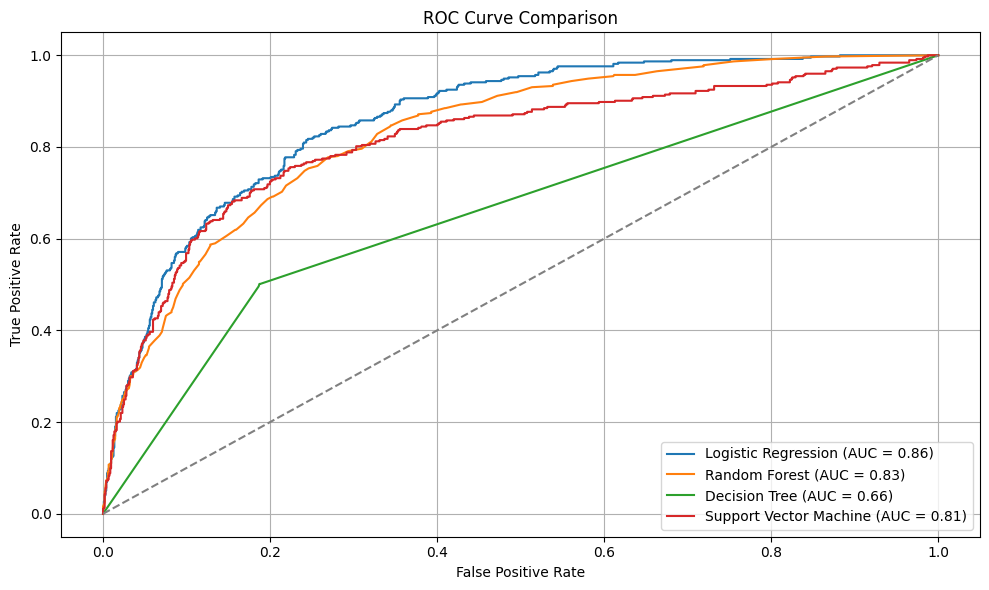

In [5]:
# Step 3: ROC Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

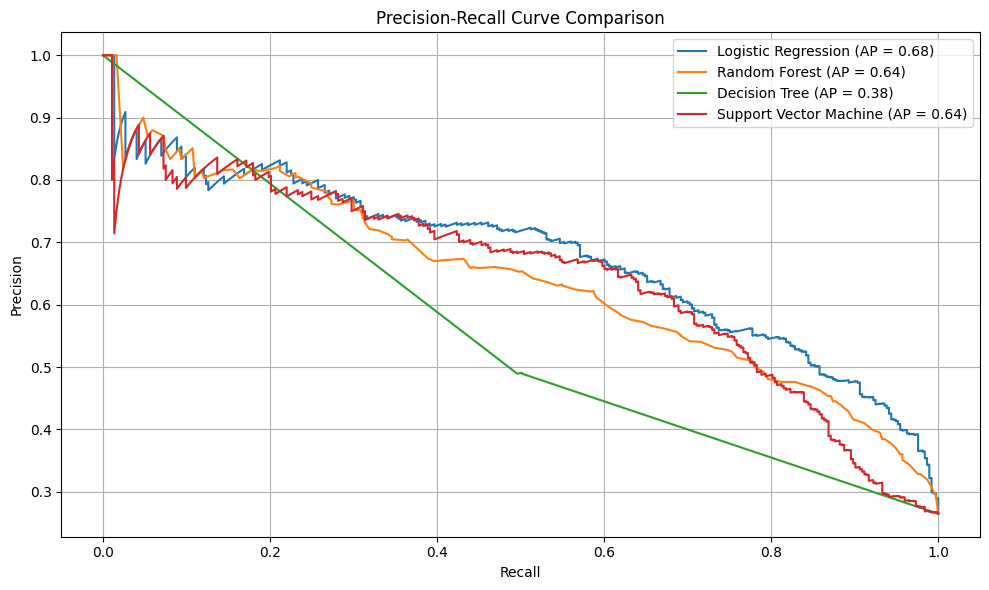

In [6]:
# Step 4: Precision-Recall Curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        avg_precision = average_precision_score(y_test, y_scores)
        plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

plt.title('Precision-Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()